Link github repo: https://github.com/NibuTake/PyDEA

Link documentazione: https://nibutake.github.io/PyDEA/index.html

In [1]:
!pip install Pyfrontier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 25.5 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from Pyfrontier.frontier_model import EnvelopDEA

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [5]:
# Caricamento dateset in csv
df = pd.read_csv('Dataset.csv')
# Impostazione la colonna 'dmu' come indice
df.set_index('dmu', inplace=True)
# Sostituzione valori negativi nella colonna 'o_rendimentoatteso' con una costante molto piccola tendente a 0
df['o_rendimentoatteso'] = df['o_rendimentoatteso'].apply(lambda x: 0.0001 if x < 0 else x)

df

,i_deviazionestandard,i_beta,i_commissionedingresso,o_rendimentoatteso
dmu,,,,
AcomeA_PMITALIA_ESG_A1,0.009,0.48,0.04,0.0370
Acomea_Pmitalia_Esg_P2,0.021,0.51,0.00,0.0410
Allianz_Azioni_Italia_All_Stars_A,0.010,0.62,0.02,0.0470
Albemarle_Target_Italy_A,0.011,0.58,0.05,0.0370
Algebris_Ucits_Funds_Plc_Algebris_Core_Italy_Fund_R_Eur_Acc,0.010,0.72,0.03,0.0320
Amundi_Impegno_Italia_B,0.010,0.59,0.03,0.0380
Amundi_Sviluppo_Attivo_Italia_A,0.011,0.62,0.02,0.0400
Anima_Iniziativa_Italia_A,0.010,0.57,0.04,0.0520
Anima_Italia_A,0.010,0.60,0.04,0.0540


In [6]:
# Applicazione modello DEA: CCR, input-oriented
dea = EnvelopDEA("CRS", "in")

# Esecuzione del fit con il dataset
dea.fit(
    df[["i_deviazionestandard", "i_beta", "i_commissionedingresso"]].to_numpy(),
    df[["o_rendimentoatteso"]].to_numpy()
)

In [7]:
# Visualizzazione dati del modello per ogni DMU

# Creazione di una lista di dizionari per ogni DMU
results = []

# Itera su tutti i risultati delle DMU
for i, result in enumerate(dea.result):
    # Salva i risultati di ciascuna DMU in un dizionario
    dmu_result = {
        "Punteggio di efficienza": result.score,  # Punteggio di efficienza
        "Efficienza": "Efficiente" if result.is_efficient else "Non efficiente",  # Stato di efficienza
        "Ha slack": "Sì" if result.has_slack else "No",  # Se ha slack
        "Slack input 1": result.x_slack[0] if len(result.x_slack) > 0 else None,  # Slack sugli input (1°)
        "Slack input 2": result.x_slack[1] if len(result.x_slack) > 1 else None,  # Slack sugli input (2°)
        "Slack input 3": result.x_slack[2] if len(result.x_slack) > 2 else None,  # Slack sugli input (3°)
        "Slack output 1": result.y_slack[0] if len(result.y_slack) > 0 else None,  # Slack sugli output (1°)
    }
    results.append(dmu_result)

# Creazione del DataFrame a partire dalla lista di dizionari
results_df = pd.DataFrame(results)


# Impostazione dell'indice del DataFrame come i nomi delle DMU (assumendo che i nomi delle DMU siano nell'indice di df)
results_df.index = df.index

# Download dataframe con i dati su ogni DMU
results_df.to_csv("DMU_statistiche.csv", index=True)
files.download("DMU_statistiche.csv")

results_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Punteggio di efficienza,Efficienza,Ha slack,Slack input 1,Slack input 2,Slack input 3,Slack output 1
dmu,,,,,,,
AcomeA_PMITALIA_ESG_A1,0.796651,Non efficiente,Sì,0.000328,-6.554888e-03,0.007129,0.0
Acomea_Pmitalia_Esg_P2,1.000000,Efficiente,No,0.000000,0.000000e+00,0.000000,0.0
Allianz_Azioni_Italia_All_Stars_A,1.000000,Efficiente,No,0.000000,0.000000e+00,0.000000,0.0
Albemarle_Target_Italy_A,0.657237,Non efficiente,Sì,0.000388,-7.749908e-03,0.008125,0.0
Algebris_Ucits_Funds_Plc_Algebris_Core_Italy_Fund_R_Eur_Acc,0.561404,Non efficiente,No,0.000000,-4.902358e-01,0.000000,0.0
Amundi_Impegno_Italia_B,0.687831,Non efficiente,No,0.000000,-3.211351e-01,0.000000,0.0
Amundi_Sviluppo_Attivo_Italia_A,0.824824,Non efficiente,No,0.000000,-6.085408e-02,0.000000,0.0
Anima_Iniziativa_Italia_A,0.959672,Non efficiente,Sì,0.000386,-7.723802e-03,0.009703,0.0
Anima_Italia_A,0.959211,Non efficiente,Sì,0.000066,-1.315505e-03,0.009158,0.0


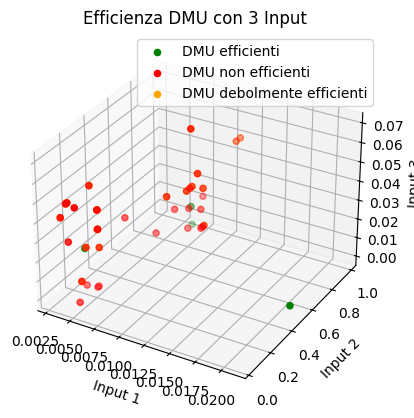

In [8]:
# Visualizzazione grafica delle DMU

from mpl_toolkits.mplot3d import Axes3D

# Creazione del grafico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Estrai i DMU efficienti, inefficienti e debolmente efficienti
eff_dmu = [r.dmu for r in dea.result if r.is_efficient]
ineff_dmu = [r.dmu for r in dea.result if r.is_efficient != 1]
weak_eff_dmu = [r.dmu for r in dea.result if r.has_slack]

# DMU efficienti
ax.scatter(
    [d.input[0] for d in eff_dmu],
    [d.input[1] for d in eff_dmu],
    [d.input[2] for d in eff_dmu],  # Terzo input
    color="green", label="DMU efficienti", marker="o"
)

# DMU inefficienti
ax.scatter(
    [d.input[0] for d in ineff_dmu],
    [d.input[1] for d in ineff_dmu],
    [d.input[2] for d in ineff_dmu],  # Terzo input
    color="red", label="DMU non efficienti", marker="o"
)

# DMU debolmente efficienti
ax.scatter(
    [d.input[0] for d in weak_eff_dmu],
    [d.input[1] for d in weak_eff_dmu],
    [d.input[2] for d in weak_eff_dmu],  # Terzo input
    color="orange", label="DMU debolmente efficienti", marker="o"
)

# Etichette degli assi
ax.set_xlabel("Input 1")
ax.set_ylabel("Input 2")
ax.set_zlabel("Input 3")

# Titolo e legenda
ax.set_title("Efficienza DMU con 3 Input")
ax.legend()

# Mostra il grafico
plt.show()

In [ ]:
# Calcolo delle combinazioni efficienti per ogni DMU

# Creazione di un dataframe vuoto per le combinazioni efficienti
df_dmu_comb_eff = pd.DataFrame(columns=[f"{df.index[i]}" for i in range(len(dea.result))])

# Iterazione su tutti i risultati delle DMU
for i, result in enumerate(dea.result):
    # Estrarre i pesi lambda
    lambda_weights = result.weights

    # Crea un dizionario per memorizzare i pesi di ciascuna DMU
    dmu_weights = {f"{j}": (lambda_weights[j] if lambda_weights[j] > 0 else 0) for j in range(len(lambda_weights))}

    # Aggiungi i pesi nel dataframe
    df_dmu_comb_eff.loc[i] = list(dmu_weights.values())

# Impostazione i nomi delle DMU come indice del dataframe
df_dmu_comb_eff.index = df.index

#df_dmu_comb_eff.sum(axis=1)
df_dmu_comb_eff

In [ ]:
# Calcolo della composizione normalizzata per ogni DMU, a parità di input inziale

# Normalizzazione delle righe: ogni valore diviso per la somma della riga
df_normalized_comb_eff = df_dmu_comb_eff.div(df_dmu_comb_eff.sum(axis=1), axis=0)

df_normalized_comb_eff.index = df.index

# Download dataframe con combinazioni efficienti per ogni DMU
df_normalized_comb_eff.to_csv("DMU_combinazioni_efficienti.csv", index=True)
files.download("DMU_combinazioni_efficienti.csv")

df_normalized_comb_eff

In [ ]:
# Creazione dataframe con input e output pondeati per le combinazioni efficienti di ogni DMU

# Creazione di una lista per memorizzare i nuovi input e output ponderati
inputs_dmu_efficienti = []
outputs_dmu_efficienti = []

# Iterazione su ogni DMU (ogni riga di df_normalized_comb_eff)
for i, row in df_normalized_comb_eff.iterrows():
    # Calcolo della somma ponderata degli input (ora includendo il terzo input)
    weighted_inputs = row.dot(df[["i_deviazionestandard", "i_beta", "i_commissionedingresso"]].to_numpy())
    # Calcolo della somma ponderata degli output
    weighted_outputs = row.dot(df[["o_rendimentoatteso"]].to_numpy())[0]

    # Aggiungi i nuovi input e output al dataframe finale
    inputs_dmu_efficienti.append(weighted_inputs)
    outputs_dmu_efficienti.append(weighted_outputs)

# Creazione di un dataframe con i nuovi input e output ponderati
df_dmu_efficienti = pd.DataFrame({
    "input 1 ponderato": [x[0] for x in inputs_dmu_efficienti],
    "input 2 ponderato": [x[1] for x in inputs_dmu_efficienti],
    "input 3 ponderato": [x[2] for x in inputs_dmu_efficienti],  # Aggiungi il terzo input
    "output ponderato": outputs_dmu_efficienti
})

df_dmu_efficienti.index = df.index

# Download dataframe con i dati su ogni DMU
#df_dmu_efficienti.to_csv("DMU_efficienti_input_output.csv", index=True)
#files.download("DMU_efficienti_input_output.csv")

# Visualizza il dataframe finale
df_dmu_efficienti

In [ ]:
# Visualizzazione della frontiera efficiente composta dalle combinazioni efficienti per ogni DMU

# Creazione di una lista dei punti per i DMU efficienti (dal dataframe originale)
eff_dmu_inputs = df[["i_deviazionestandard", "i_beta", "i_commissionedingresso"]].iloc[[i for i, r in enumerate(dea.result) if r.is_efficient]].to_numpy()
eff_dmu_outputs = df[["o_rendimentoatteso"]].iloc[[i for i, r in enumerate(dea.result) if r.is_efficient]].to_numpy()

# Aggiunta dei punti delle combinazioni ponderate (dal dataframe df_new)
comb_eff_inputs = df_dmu_efficienti[["input 1 ponderato", "input 2 ponderato", "input 3 ponderato"]].to_numpy()
comb_eff_outputs = df_dmu_efficienti["output ponderato"].to_numpy()

# Creazione del grafico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Visualizzazione DMU efficienti (in verde) e le nuove combinazioni di DMU efficienti (in blu)
ax.scatter(eff_dmu_inputs[:, 0], eff_dmu_inputs[:, 1], eff_dmu_inputs[:, 2], color="red", label="DMU efficienti", marker="+")
ax.scatter(comb_eff_inputs[:, 0], comb_eff_inputs[:, 1], comb_eff_inputs[:, 2], color="blue", label="Combinazioni efficienti", marker="x")

ax.set_xlabel("Input 1")
ax.set_ylabel("Input 2")
ax.set_zlabel("Input 3")
ax.set_title("Frontiera Efficiente con Combinazioni di DMU")

ax.legend()

plt.show()